<a href="https://colab.research.google.com/github/viniciusrpb/cic0269_natural_language_processing/blob/main/cap06_2_cosine_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 6 - Similaridade entre Textos

Nesta seção vamos estudar estratégias para comparar dois documentos de texto que estejam representados vetores numéricos. Assume-se que esses vetores possuem a mesma dimensão $d$.

# 6.2. Similaridade Cosseno

É uma métrica que calcula a similaridade entre dois vetores numéricos a partir da normalização do produto interno entre eles. Em Processamento de Linguagem Natural, é comumente empregada para comparar a similaridade entre dois documentos representados no modelo espaço vetorial (por exemplo, Bag-of-Words, Term Frequency-Inverse Document Frequency (TF-IDF)).

### Teoria

Sabe-se que dois vetores $\vec{v_1}$ e $\vec{v_2}$ representando documentos de texto são vistos no espaço geométrico plano da seguinte maneira:

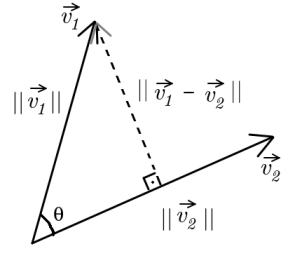

em que $||\vec{v}||$ denota o comprimento de um vetor $\vec{v}$ qualquer.

Percebe-se que $||\vec{v_1}||$ e $||\vec{v_2}||$ possuem tamanhos diferentes e, por isso, não são apropriados para comparar dois documentos de textos. O que fazer nessa situação? Podemos comparar esses documentos por meio do valor do ângulo $\theta$ entre eles!

Vamos relembrar a Lei dos Cossenos:






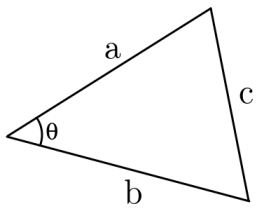

Por conveniência, colocamos aqui Lei dos Cossenos:

\begin{equation}
c^2 = a^2 + b^2 - 2 \cdot a \cdot b \cdot \cos \theta
\end{equation}

Substituindo as variáveis $a$, $b$ e $c$ pelos comprimentos dos vetores correspondentes $||\vec{v_1}||$, $||\vec{v_2}||$ e $||\vec{v_1} - \vec{v_2}||$:

\begin{equation}
||\vec{v_1} - \vec{v_2}||^2 = ||\vec{v_1}||^2 + ||\vec{v_2}||^2 - 2 \cdot ||\vec{v_1}|| \cdot ||\vec{v_2}|| \cdot \cos \theta
\end{equation}

desenvolvendo a esquerda da igualdade e com uso da propriedade comutativa entre vetores, temos que:

\begin{equation}
||\vec{v_1} - \vec{v_2}||^2 = ||\vec{v_1}||^2 - 2 \cdot \vec{v_1} \cdot \vec{v_2} + ||\vec{v_2}||^2
\end{equation}

substituindo na primeira equação, tem-se que:

\begin{equation}
||\vec{v_1}||^2 - 2 \cdot \vec{v_1} \cdot \vec{v_2} + ||\vec{v_2}||^2 = ||\vec{v_1}||^2 + ||\vec{v_2}||^2 - 2 \cdot ||\vec{v_1}|| \cdot ||\vec{v_2}|| \cdot \cos \theta
\end{equation}

fazendo-se alguns cortes nos termos, obteremos:

\begin{equation}
 - 2 \cdot \vec{v_1} \cdot \vec{v_2} = - 2 \cdot ||\vec{v_1}|| \cdot ||\vec{v_2}|| \cdot \cos \theta
\end{equation}

Isolando o cosseno

\begin{equation}
\cos \theta = \frac{\vec{v_1} \cdot \vec{v_2}}{||\vec{v_1}|| \cdot ||\vec{v_2}||} 
\end{equation}

### Abordagem Computacional

A equação da similaridade cosseno adaptada para o contexto em que $v_1$ e $v_2$ são dois vetores computacionais é fornecida a seguir:

\begin{equation}
cos(v_1,v_2) = \frac{v_1 \cdot v_2}{||v_1|| ||v_2||},
\end{equation}

em que o produto interno é calculado como um produto escalar:

\begin{equation}
v_1 \cdot v_2 = \sqrt{ \sum_{i=1}^d v_1[i] \cdot v_2[i]}
\end{equation}

em que $d$ é a dimensão dos vetores $v_1$ e $v_2$. $||v||$ é a norma L2 do vetor $v$, calculada como: 

\begin{equation}
||v|| = \sqrt{\sum_{i=1}^d v[i]^2}.
\end{equation}

### Implementação

In [1]:
import math

def cosine_similarity(vetor1,vetor2):

    prod_interno = 0

    for i,valor in enumerate(vetor1):
        prod_interno += valor*vetor2[i]
    
    norma_vetor1 = 0
    for x in vetor1:
        norma_vetor1 += x*x
    norma_vetor1 = norma_vetor1**0.5

    #norma_vetor1 = math.sqrt(sum([x**2 for x in vetor1])) 

    norma_vetor2 = 0
    for x in vetor2:
        norma_vetor2 += x*x
    norma_vetor2 = norma_vetor2**0.5

    return prod_interno/(norma_vetor1*norma_vetor2)

Verificando se a implementação está correta com o seguinte exemplo:

In [ ]:
cosine_dissimilarity([0,0,1,1],[1,0,1,0])

0.4999999999999999

### Aplicação: Recuperação de Textos

Aula do dia 30/06